# EE5175 Lab 2 : Occlusion detection
### Author : Niyas Mon P
### Roll No: EE20B094

In [453]:
#  Before running the code blocks, please ensure that the 2 images are uploaded

Two areal images (IMG1.png, IMG2.png) are given. The two images are related by **in-plane translation and rotation**. Our task is to find out the changes in the 'IMG2.png' wrt 'IMG1.png'.
We will find out the **homography** that translates IMG2 to IMG1 inorder to do this.

                              image 1


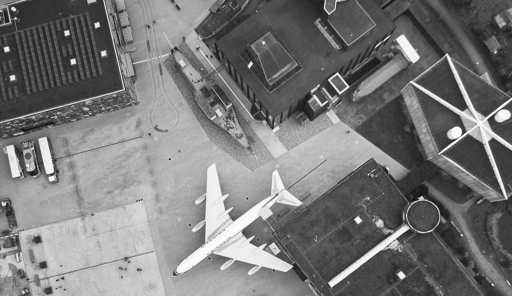


                              image 2


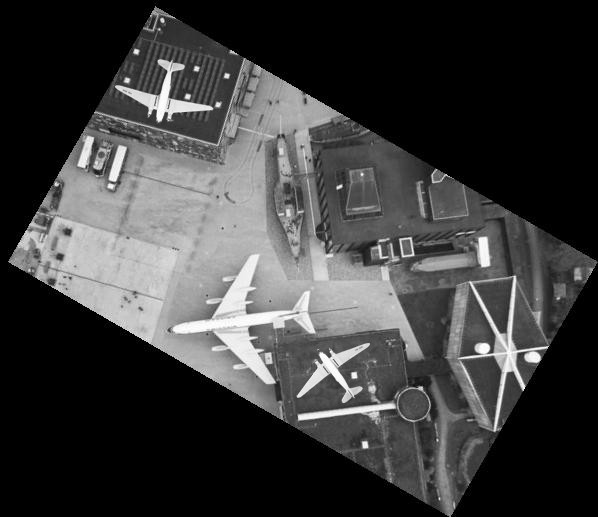

In [454]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
# reading the images
img1 = cv2.imread('IMG1.png')
img2 = cv2.imread('IMG2.png')
# dispalying the images
print("                              image 1")
cv2_imshow(img1)
print("\n                              image 2")
cv2_imshow(img2)

The given images are gray scale images but still have 3 channels with gray scale values. But we need only one channel hence we slice the image reducing the dimension from 3 to 2

In [455]:
# convert image from 3 channel to 1 channel image. cause, it is in gray scale
img1 = img1[:,:,0]
img2 = img2[:,:,0]

Target coordinate $(x_t,y_t)$ which is obtained by in-plane translation and rotation of the source image with source coordinate $(x_s,y_s)$ are related by the following equation:

\begin{align*}
\begin{bmatrix}
x_t \\
y_t \\
\end{bmatrix}
=
\begin{bmatrix}
cos(\theta) & sin(θ) \\
-sin(θ) & cos(\theta) \\
\end{bmatrix}
\begin{bmatrix}
x_s \\
y_s \\
\end{bmatrix} +
\begin{bmatrix}
t_x \\
t_y \\
\end{bmatrix}
\end{align*}

which in homography form, we can write as
\begin{align*}
\begin{bmatrix}
x_t \\
y_t \\
1\\
\end{bmatrix}
=
H
\begin{bmatrix}
x_s \\
y_s \\
1\\
\end{bmatrix}
\end{align*}

where
\begin{align*}
H =
\begin{bmatrix}
cos(\theta) & sin(θ) & t_x \\
-sin(θ) & cos(\theta) & t_y \\
0 & 0 & 1 \\
\end{bmatrix}
\end{align*}

Here we have 3 unkowns. In order to find these unkowns, we use two point correspondances
\begin{align*}
(x_{t1},y_{t1}) &= (29, 124), (x_{s1},y_{s1}) = (93, 248) ; \\
(x_{t2},y_{t2}) &= (157, 372), (x_{s2},y_{s2}) = (328, 399) ;
\end{align*}

The equations we obtain are,
\begin{align*}
29 &= 93\cdot cos(θ) + 248\cdot sin(θ) + t_x \\
124 &= 248\cdot cos(θ)  - 93\cdot sin(θ) + t_y \\
157 &= 328\cdot cos(θ) + 399\cdot sin(θ) + t_x \\
372 &= 399\cdot cos(θ)  - 328\cdot sin(θ) + t_y \\
\end{align*}

On writing it in matrix form,
\begin{align*}
\begin{bmatrix}
93 & 248 & 1 & 0 \\
248 & -93 & 0 & 1\\
328 & 399 & 1 & 0\\
399 & -328 & 0 & 1\\
\end{bmatrix}
\begin{bmatrix}
cos(θ) \\
sin(θ) \\
t_x \\
t_y \\
\end{bmatrix}
=
\begin{bmatrix}
29 \\
124 \\
157 \\
372 \\
\end{bmatrix}
\end{align*}

The linear equation is solved using ***numpy.linalg.solve()*** to get the values of $\theta$,  $t_x$ and $t_y$

In [456]:
# Finding out the unkown parametres using point correspondance
# Matrix to solve the equation
A = np.array([[93, 248, 1, 0],
              [248, -93, 0, 1],
              [328, 399, 1, 0],
              [399, -328, 0, 1]])

b = np.array([29, 124, 157, 372])
# solving the equation
solution = np.linalg.solve(A, b)
# getting the value of unkowns
theta ,tx, ty = np.arcsin(solution[1]) , solution[3], solution[2]

print("Solution:", solution)

Solution: [   0.8654551    -0.49921821   72.31879117 -137.06015943]


The values obtained are,
\begin{align*}
cos(θ) &= 0.865 \\
sin(θ) &= -0.499 \\
t_x    &= 72.32 \\
t_y    &= -137.06
\end{align*}

Homography, H matrix is created using these values

In [457]:
# homography matrix
H_matrix =  np.array([[np.cos(theta) , -np.sin(theta), tx],
                      [np.sin(theta), np.cos(theta) , ty],
                      [0             , 0            , 1 ]])

#### Solving using homography
\begin{align*}
\begin{bmatrix}
x_t \\
y_t \\
1\\
\end{bmatrix}
=
\begin{bmatrix}
cos(\theta) & sin(θ) & t_x \\
-sin(θ) & cos(\theta) & t_y \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_s \\
y_s \\
1\\
\end{bmatrix}\\\\
\end{align*}
Getting source coordinates from target,
\begin{align*}\\
\begin{bmatrix}
x_s \\
y_s \\
1\\
\end{bmatrix}
=
\begin{bmatrix}
cos(\theta) & sin(θ) & t_x \\
-sin(θ) & cos(\theta) & t_y \\
0 & 0 & 1 \\
\end{bmatrix}^{-1}
\begin{bmatrix}
x_t \\
y_t \\
1\\
\end{bmatrix}
\end{align*}
\begin{align*}\\
a &= x_s - \lfloor x_s \rfloor \\
b &= y_s - \lfloor y_s \rfloor
\end{align*}
Using bilinear interpolation,

<font size="-1">
\begin{align*}\\
I_t(x_t,y_t) &= (1-a) \cdot (1-b) \cdot I_s(\lfloor x_s \rfloor,\lfloor y_s \rfloor) + (1-a) \cdot b \cdot I_s(\lfloor x_s \rfloor,\lfloor y_s \rfloor + 1) + a \cdot (1-b) \cdot I_s(\lfloor x_s \rfloor + 1,\lfloor y_s \rfloor) + a \cdot b \cdot I_s(\lfloor x_s \rfloor + 1,\lfloor y_s \rfloor + 1) \\
\end{align*}


In [458]:
# function to map source image to target using homography
def solve_by_homography(image,H_matrix):
  # finding the image height and width
  height, width = image.shape[0], image.shape[1]
  # creating a blank image for target
  image_target = np.zeros((height, width))

  for xt in range(width):
    for yt in range(height):
      target = np.array([xt, yt,1])
      xs, ys, _ = np.linalg.solve(H_matrix, target)
      # floor values of source pixel coordinates
      xs_f = int(np.floor(xs))
      ys_f = int(np.floor(ys))
      # a,b used for bilnear interpolation
      a = xs - xs_f
      b = ys - ys_f

      # Source to target mapping using bilinear interpolation
      if (xs_f < width-1) & (ys_f <height-1) & (xs_f > 0) & (ys_f > 0): # update only if sourse pixels falls within the range else remains as blank
        image_target[yt,xt] = (1-a)*(1-b)*image[ys_f ,xs_f] + (1-a)*(b)*image[ys_f+1,xs_f] + a*(1-b)*image[ys_f,xs_f+1] + (a*b)*image[ys_f+1,xs_f+1]
  # displaying the target image
  # cv2_imshow(image_target)
  return image_target

                             target image


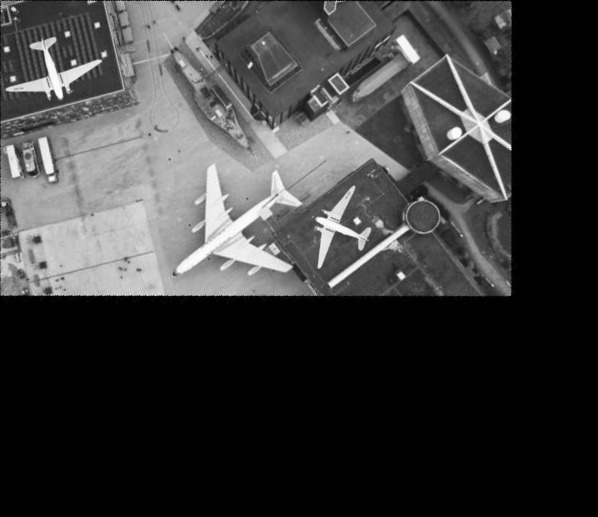

In [459]:
# target image after applying homography
img2_targ = solve_by_homography(img2,H_matrix) # target image
print("                             target image")
cv2_imshow(img2_targ)

Since the obtained image is bigger size, we need to crop it to the dimension of IMG1

                           image 1


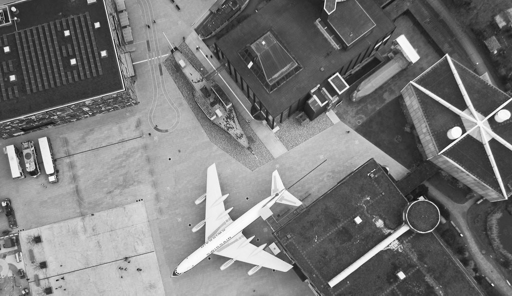


                   cropped target image


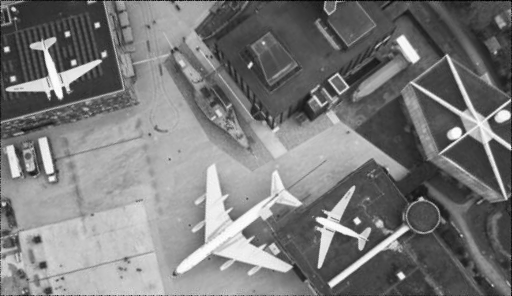

In [460]:
height1, width1 = img1.shape
# cropping the taget image to the size of image 1
img2_targ_cropped = img2_targ[:height1,:width1]
# displaying image 1 and cropped taget image
print("                           image 1")
cv2_imshow(img1)
print("\n                   cropped target image")
cv2_imshow(img2_targ_cropped)


Subtract the two images inorder to find the differences

                      difference image


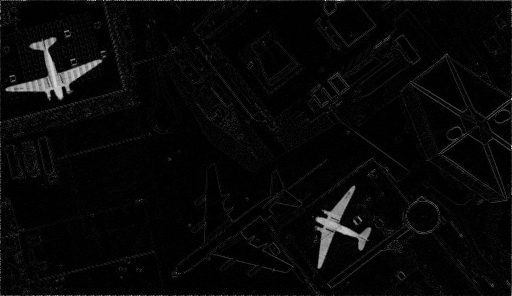

In [461]:
# absolute difference between target (cropped) image and image 1
img_diff = abs(img1 - img2_targ_cropped)
# display difference image
print("                      difference image")
cv2_imshow(img_diff)

We can see that the additional 2 airplanes detected in the difference image which means that our homography is correct. We still see some small white color part (like small lines) here and there. To remove them, we will use a threshold intensity above which all pixels will take same high intensity and below which everything will take zero intensity.

To find out the best threshold, we are ploting a histogram of pixel intensities in the difference image

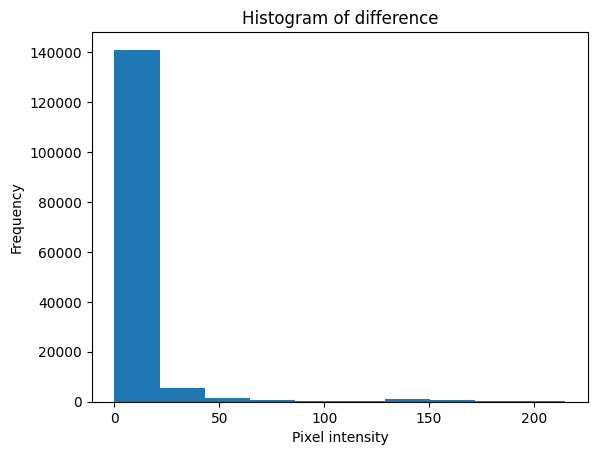

In [462]:
import matplotlib.pyplot as plt

# Ploting the histogram of pixel intensities of difference image to find out a better threshold value
plt.hist(img_diff.flatten())
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.title('Histogram of difference')
plt.show()

From the histogram, we see a lot of low intensity values are there below intensity of 100 and some high intensity above it (which corresponds to additional airplanes). Hence the best threshold is 100. We will filter using this threshold.

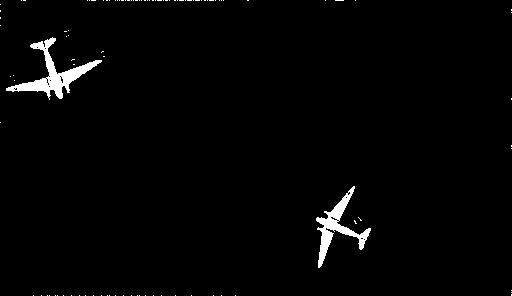

In [463]:
# from the histogram of the pixel intensities of the difference image,
# 100 is the better threshold value
threshold = 100
# np.where finds where the given expression is true and replaces with 2nd value given as argument else 3rd value
img_diff = np.where(img_diff > threshold, 255, 0)
cv2_imshow(img_diff)

After filtering using threshold, we see clear distiction of 2 airplanes and other smaller noises are removed off



## Conclusions


*   The two images are related by in-plane rotation and translation. Hence we found the homography that translated IMG2 to IMG1.
*   The translated image is little bit blured than original image, it could be due to bilinear interpolation.
*   To find the changes of IMG2 wrt IMG1, the difference of two images are found.
*   The difference image had 2 airplanes and some whilte lines/noise here and there in low intensity.
* The noise is removed by applying a threshold condition on the intensities.

